# credits

## This project is made by
 * Youssef medhat
 * Mahmoud soliman
 * Mohamed Antar
 * Mai maged
 * Manar Mosbah
 * Nada abdulbaky
 * Malak Azmy


# Import

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.impute import KNNImputer
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import time

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Exploring

In [80]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [82]:
train.shape

(103904, 25)

In [83]:
test.shape

(25976, 25)

In [84]:
train.head(18)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# Data Preprocessing

Checking nulls count

In [85]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Nulls only found in the Arrival Delay in Minutes

## *** nulls imputation using KNN Imputer      *bouns

In [86]:
imputer = KNNImputer(n_neighbors=5)
train['Arrival Delay in Minutes'] = imputer.fit_transform(train[['Arrival Delay in Minutes']])
train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [87]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Removing the nulls of the test as it won't matter in the performance of the models

In [88]:
test.dropna(subset=["Arrival Delay in Minutes"],inplace=True)

## duplicates

In [89]:
print(train.duplicated().sum())

0


In [90]:
print(test.duplicated().sum())

0


there is no duplicates found

## visualizing possible outliars using Box-plot

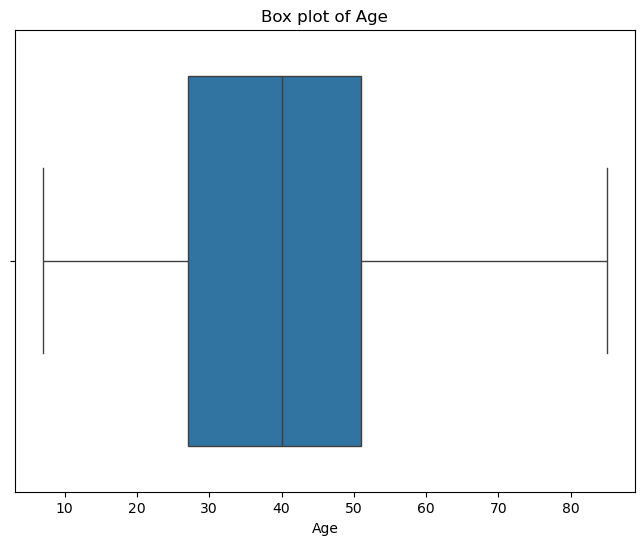

Number of outliers in 'Age': 0


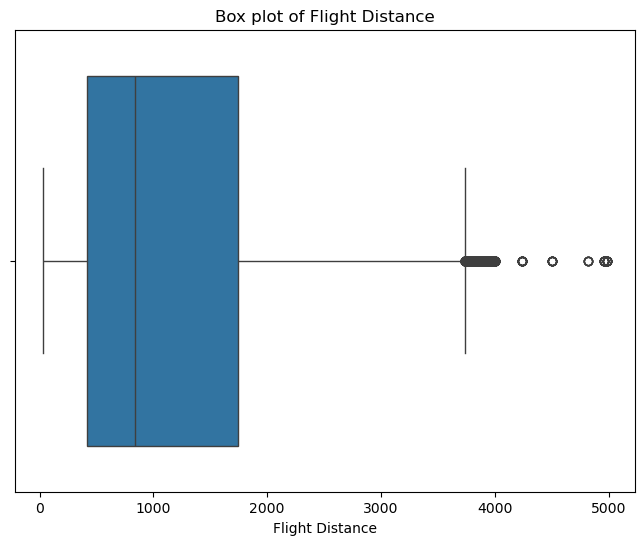

Number of outliers in 'Flight Distance': 2291


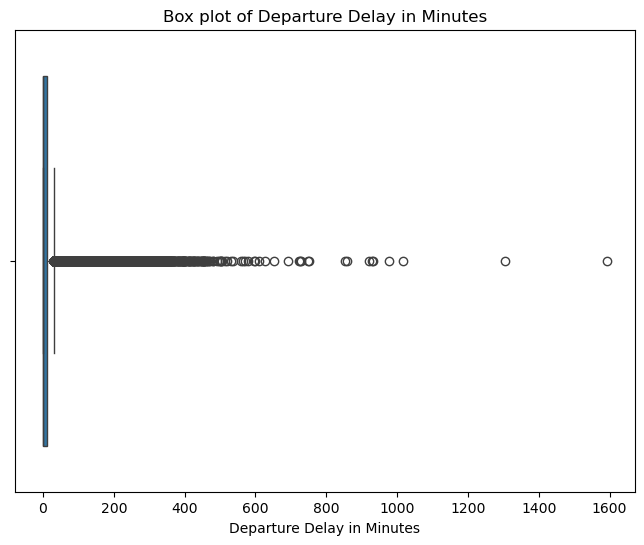

Number of outliers in 'Departure Delay in Minutes': 14529


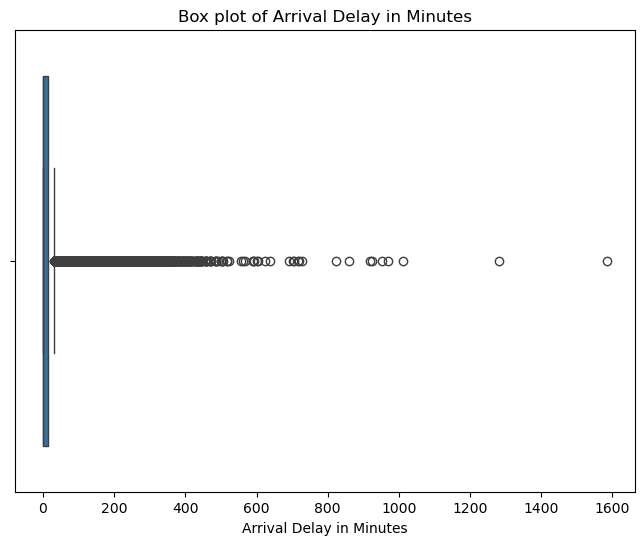

Number of outliers in 'Arrival Delay in Minutes': 13954


In [91]:
numerical_cols = train.select_dtypes(include=np.number).columns.tolist()
rating_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
               'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
               'Inflight entertainment', 'On-board service', 'Leg room service',
               'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness','satisfaction','Unnamed: 0','id']

# Ensure rating_cols only contains columns that are actually present in the DataFrame
rating_cols_present = [col for col in rating_cols if col in train.columns]

plot_cols = [col for col in numerical_cols if col not in rating_cols_present]

# Generate box plots for the selected numerical columns
for col in plot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[col])
    plt.title(f'Box plot of {col}')
    plt.show()

    # Calculate and print the count of outliers
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = train[(train[col] < lower_bound) | (train[col] > upper_bound)].shape[0]
    print(f"Number of outliers in '{col}': {outliers_count}")

in this data set the majority of the features are rating ranges from 1-5 and the extreme values of the other cols have a meaning and a great influence on the predction for this we won't treat them

## encoding

In [92]:
"""
 Gender  >>  male / female
Customer Type >>   loyal /disloyal
Type of Travel >>  personal/ buisness
Class  >>  eco / buisness/ eco plus
satisfaction >> neutral or dissatisfied  /  satisfied
"""

'\n Gender  >>  male / female\nCustomer Type >>   loyal /disloyal\nType of Travel >>  personal/ buisness\nClass  >>  eco / buisness/ eco plus\nsatisfaction >> neutral or dissatisfied  /  satisfied\n'

In [93]:
label_encoder = LabelEncoder()

train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Customer Type'] = label_encoder.fit_transform(train['Customer Type'])
train['Type of Travel'] = label_encoder.fit_transform(train['Type of Travel'])
train['Class'] = label_encoder.fit_transform(train['Class'])
train['satisfaction'] = label_encoder.fit_transform(train['satisfaction'])


In [94]:
test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['Customer Type'] = label_encoder.fit_transform(test['Customer Type'])
test['Type of Travel'] = label_encoder.fit_transform(test['Type of Travel'])
test['Class'] = label_encoder.fit_transform(test['Class'])
test['satisfaction'] = label_encoder.fit_transform(test['satisfaction'])

## drop columns

Drop unnecessary columns

In [95]:
train.drop(['id'],axis=1,inplace=True)
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [96]:
test.drop(['id'],axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [97]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


# EDA

## Data visualizations

Check the balance of the target feature

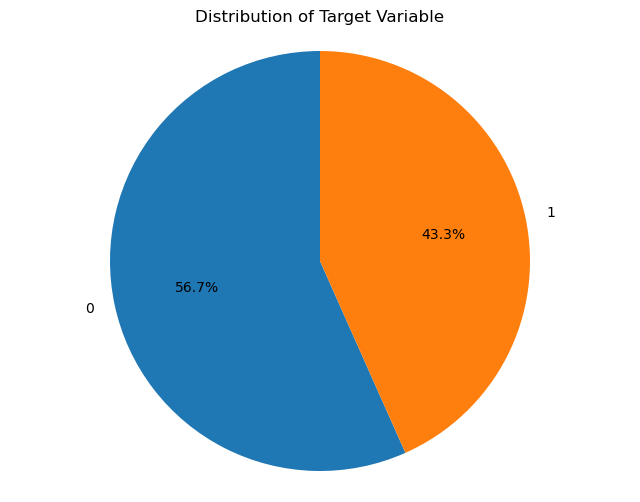

Target variable counts:


satisfaction
0    58879
1    45025
Name: count, dtype: int64

In [98]:


# Assuming 'target' is the name of your target column
target_counts = train['satisfaction'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print("Target variable counts:")
target_counts


the data is kind of imbalanced and that could affect the performance on the minor class this should be treated and it's likely to drop some random samples to match the percantage of the two clasess as we have a plenty of data records and removing the excess in the major class wouldn't be a problem we will do the undersampling as we dont't need to create samples using smote that could possibly affect the model prediction on real values in this situation we preferd undersampling over SMOTE

*** undersampling

New target variable counts after undersampling:
satisfaction
1    45025
0    45025
Name: count, dtype: int64


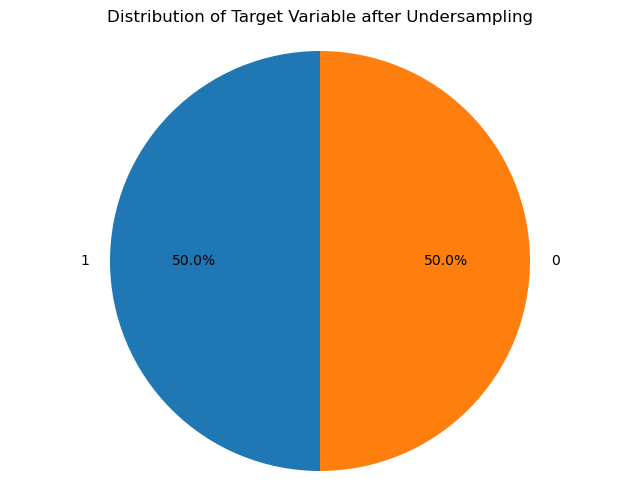

In [99]:
majority_class = train['satisfaction'].value_counts().idxmax()
minority_class = train['satisfaction'].value_counts().idxmin()

# Get the count of the minority class
minority_count = train['satisfaction'].value_counts()[minority_class]

# Separate the majority and minority class dataframes
df_majority = train[train['satisfaction'] == majority_class]
df_minority = train[train['satisfaction'] == minority_class]

# Undersample the majority class
df_majority_undersampled = df_majority.sample(n=minority_count, random_state=42) # Use a random_state for reproducibility

# Concatenate the undersampled majority class dataframe and the minority class dataframe
train = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the dataframe to mix the samples
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new balance
print("New target variable counts after undersampling:")
print(train['satisfaction'].value_counts())

new_target_counts = train['satisfaction'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(new_target_counts, labels=new_target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable after Undersampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

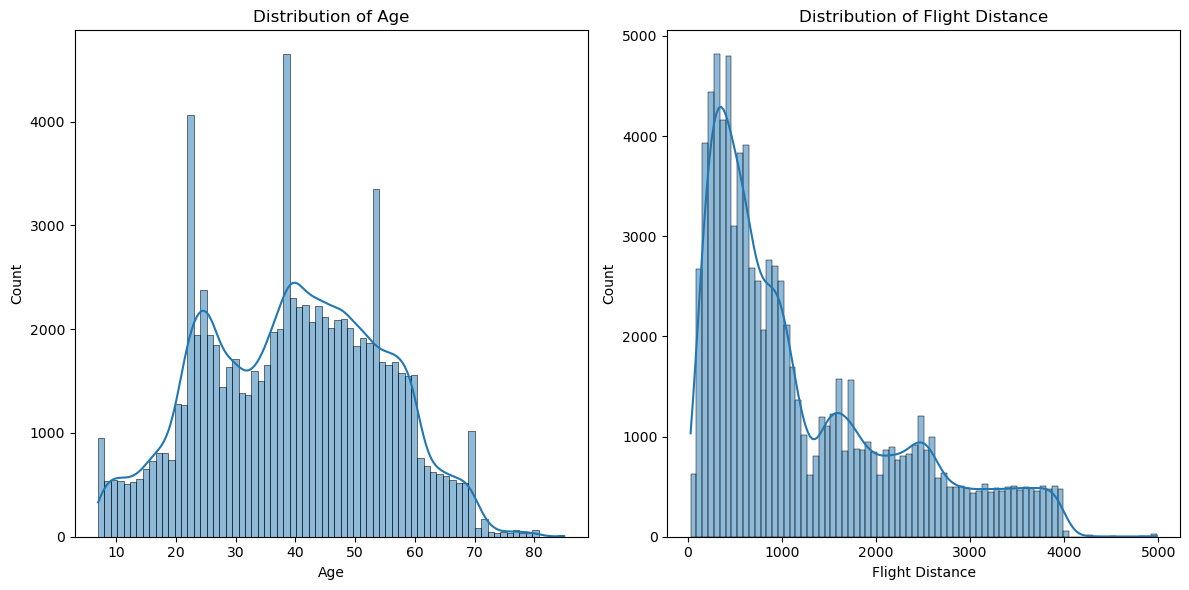

In [100]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(train['Flight Distance'], kde=True)
plt.title('Distribution of Flight Distance')

plt.tight_layout()
plt.show()


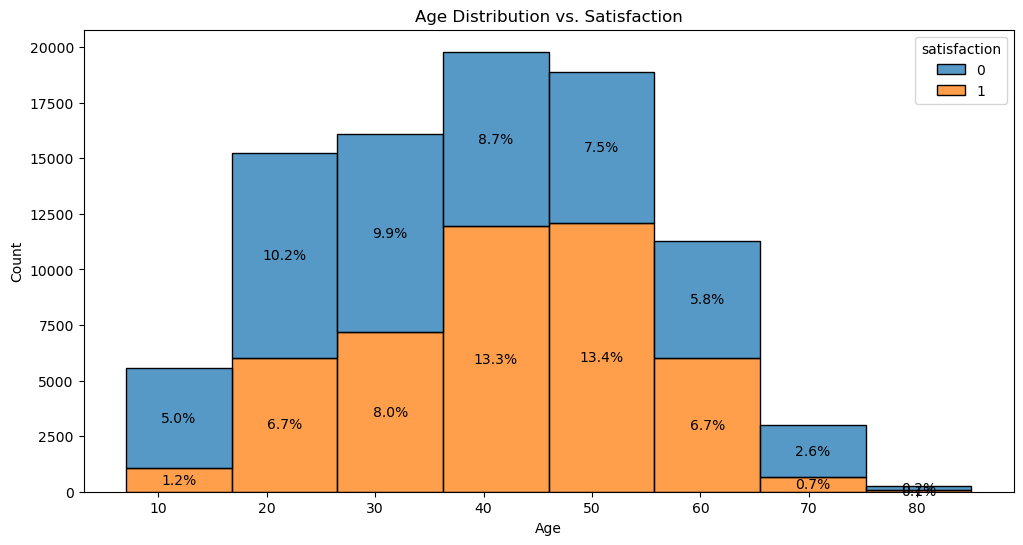

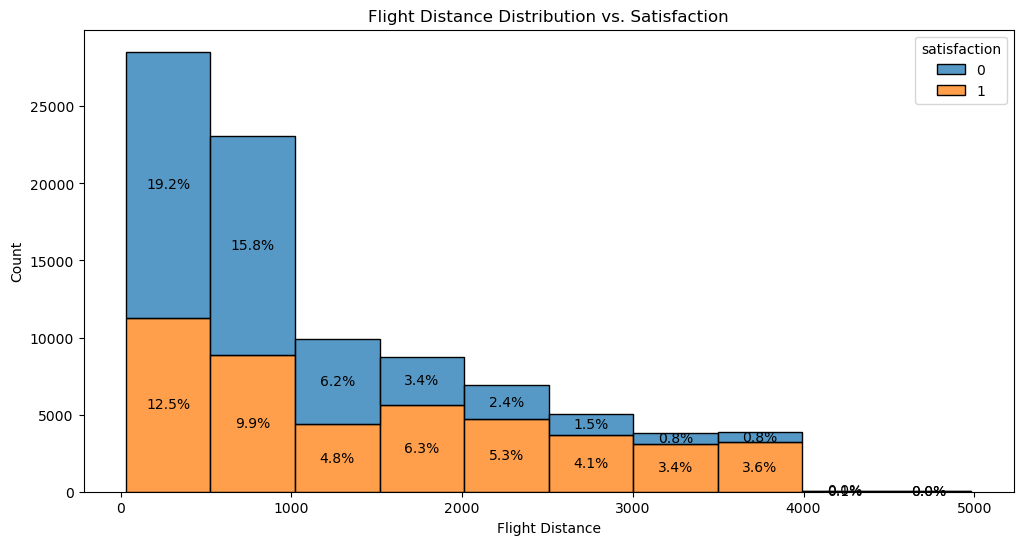

In [101]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='Age', hue='satisfaction', multiple='stack', bins=8) # Reduced bins to 8
plt.title('Age Distribution vs. Satisfaction')
plt.xlabel('Age')
plt.ylabel('Count')

# Annotate with percentages
total = len(train)
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    plt.annotate(f'{height/total:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='Flight Distance', hue='satisfaction', multiple='stack', bins=10) # Reduced bins to 10
plt.title('Flight Distance Distribution vs. Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Count')

# Annotate with percentages
total = len(train)
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    plt.annotate(f'{height/total:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


<Figure size 1000x800 with 0 Axes>

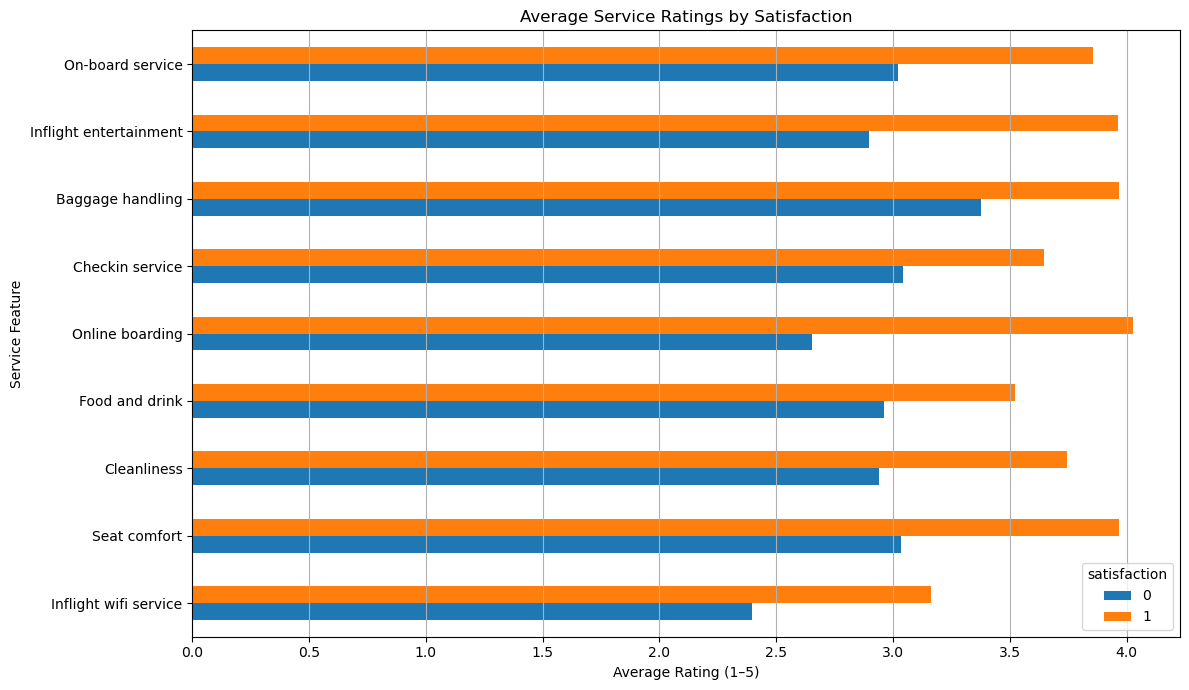

In [102]:
rating_cols = ['Inflight wifi service', 'Seat comfort', 'Cleanliness',
               'Food and drink', 'Online boarding', 'Checkin service',
               'Baggage handling', 'Inflight entertainment', 'On-board service']

mean_ratings = train.groupby('satisfaction')[rating_cols].mean().T

plt.figure(figsize=(10, 8))
mean_ratings.plot(kind='barh', figsize=(12, 7))
plt.title("Average Service Ratings by Satisfaction")
plt.xlabel("Average Rating (1–5)")
plt.ylabel("Service Feature")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


From this plot we can notice that when the value of the rating passes the 75% percent this always gives more satisfaction

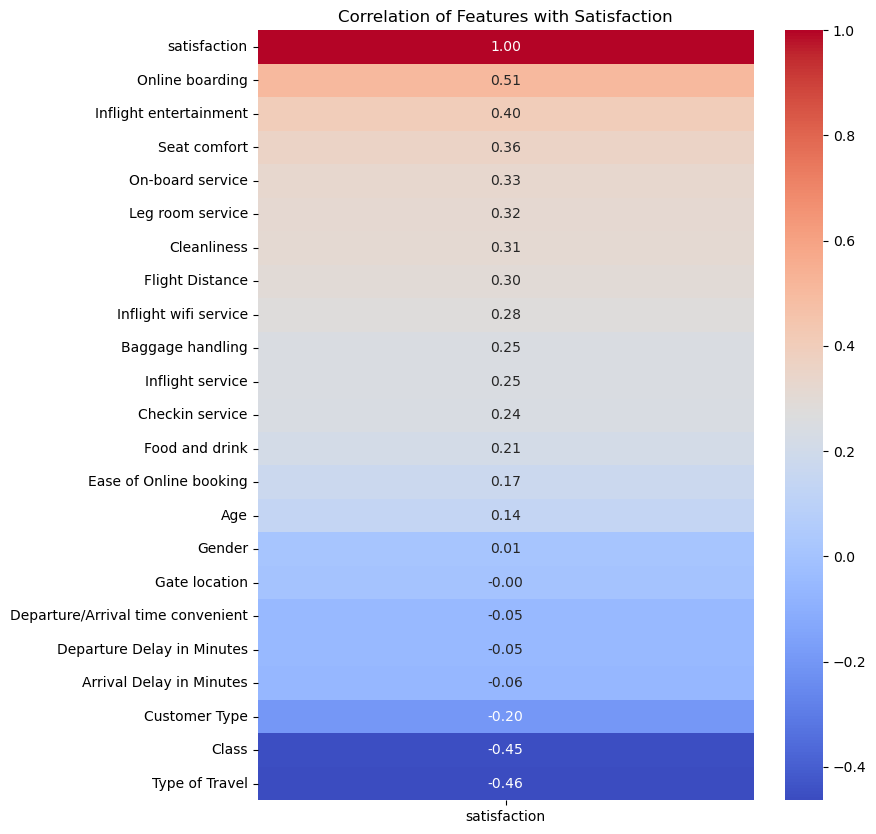

In [103]:
# Calculate the correlation matrix
correlation_matrix = train.corr()

# Extract the correlation with 'satisfaction'
satisfaction_correlation = correlation_matrix[['satisfaction']].sort_values(by='satisfaction', ascending=False)

# Create the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(satisfaction_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Satisfaction')
plt.show()

# Modeling

split data


In [104]:
X_train = train.drop(columns=['satisfaction'])  # drop the target column from the features
y_train = train['satisfaction']  # extract the target column

X_test = test.drop(columns=['satisfaction'])
y_test = test['satisfaction']

## *** cross validation 

In [105]:
def run_kfold_cv(model, X_train, y_train, model_name="Model", k=5):
    print(f"\n[INFO] Running {k}-Fold Cross Validation for {model_name}...")

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_accuracies = []

    X_array = X_train.values if hasattr(X_train, 'values') else X_train
    y_array = y_train.values if hasattr(y_train, 'values') else y_train

    for train_idx, val_idx in kf.split(X_array):
        X_k_train, X_k_val = X_array[train_idx], X_array[val_idx]
        y_k_train, y_k_val = y_array[train_idx], y_array[val_idx]

        temp_model = model.__class__(**model.get_params())  # Clone with same hyperparams
        temp_model.fit(X_k_train, y_k_train)
        y_k_pred = temp_model.predict(X_k_val)

        acc = accuracy_score(y_k_val, y_k_pred)
        cv_accuracies.append(acc)

    print("Fold Accuracies:", cv_accuracies)
    print("Average CV Accuracy:", np.mean(cv_accuracies))


standardizing the data within a unified range

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Model

In [107]:
reg_model = LogisticRegression()

# Run K-Fold Cross Validation on training data
run_kfold_cv(reg_model, X_train_scaled, y_train, model_name="Logistic Regression")

# Train the model on full training data
reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = reg_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



[INFO] Running 5-Fold Cross Validation for Logistic Regression...
Fold Accuracies: [0.8683509161576902, 0.8677956690727374, 0.8666296501943365, 0.8709050527484731, 0.8699611327040533]
Average CV Accuracy: 0.8687284841754581
Logistic Regression Accuracy: 0.8661028077086471

Confusion Matrix:
 [[12724  1804]
 [ 1663  9702]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     14528
           1       0.84      0.85      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.86      0.86      0.86     25893
weighted avg       0.87      0.87      0.87     25893



SVM

In [108]:


svm_model = SVC( kernel='rbf')

# 1. Cross-validation on subset
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=3)

# 2. Train model on entire scaled training data
svm_model.fit(X_train_scaled, y_train)

# 3. Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# 4. Evaluate
print("\nSVM Accuracy on Test Set:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))





SVM Accuracy on Test Set: 0.9535781871548294

Confusion Matrix:
 [[13974   554]
 [  648 10717]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     14528
           1       0.95      0.94      0.95     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



Decision Tree Model

In [109]:
tree_model = DecisionTreeClassifier()

# Run K-Fold Cross Validation on training data
run_kfold_cv(tree_model, X_train_scaled, y_train, model_name="Decision Tree")

# Train the model on full training data
tree_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate model performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))



[INFO] Running 5-Fold Cross Validation for Decision Tree...
Fold Accuracies: [0.9446418656302055, 0.9412548584119933, 0.9431426985008329, 0.9418656302054415, 0.9440866185452527]
Average CV Accuracy: 0.9429983342587451
Decision Tree Accuracy: 0.9451975437376897

Confusion Matrix:
 [[13689   839]
 [  580 10785]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     14528
           1       0.93      0.95      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.94      0.95      0.94     25893
weighted avg       0.95      0.95      0.95     25893



Random Forest Model

In [110]:
RF_model = RandomForestClassifier()

# Run K-Fold Cross Validation on training data
run_kfold_cv(RF_model, X_train_scaled, y_train, model_name="Random Forest")

# Train the model on full training data
RF_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_RF = RF_model.predict(X_test_scaled)

# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_RF))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_RF))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RF))



[INFO] Running 5-Fold Cross Validation for Random Forest...
Fold Accuracies: [0.9600777345918934, 0.9575791227096058, 0.9591338145474736, 0.9601332593003886, 0.9585230427540256]
Average CV Accuracy: 0.9590893947806773
Random Forest Accuracy: 0.9610319391341289

Confusion Matrix:
 [[14091   437]
 [  572 10793]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     14528
           1       0.96      0.95      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



KNN Model

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Run K-Fold Cross Validation on training data
run_kfold_cv(knn_model, X_train_scaled, y_train, model_name="K-Nearest Neighbors")

# Train the model on full training data
knn_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate model performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



[INFO] Running 5-Fold Cross Validation for K-Nearest Neighbors...
Fold Accuracies: [0.9266518600777346, 0.925152692948362, 0.9254303164908384, 0.9203775680177679, 0.9227096057745697]
Average CV Accuracy: 0.9240644086618545
KNN Accuracy: 0.9283203954736802

Confusion Matrix:
 [[13792   736]
 [ 1120 10245]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     14528
           1       0.93      0.90      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893



# ***XGboost with random search 


Training XGBoost with RandomizedSearchCV...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

XGBoost with RandomizedSearchCV completed in 13.59 seconds
Best parameters: {'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0}
XGBoost Training Accuracy: 0.9550
XGBoost Test Accuracy: 0.9571


<Figure size 1000x600 with 0 Axes>

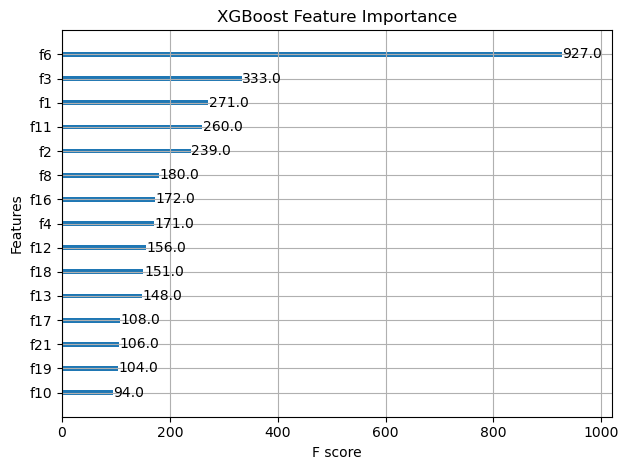

In [112]:
# Suppress XGBoost warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
print("\nTraining XGBoost with RandomizedSearchCV...")
start_time = time.time()

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best model
xgb_best = random_search.best_estimator_

# Evaluate on test set
y_pred_xgb = xgb_best.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Evaluate on training set
y_train_pred_xgb = xgb_best.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, y_train_pred_xgb)

# Print results
print(f"\nXGBoost with RandomizedSearchCV completed in {time.time() - start_time:.2f} seconds")
print(f"Best parameters: {random_search.best_params_}")
print(f"XGBoost Training Accuracy: {xgb_train_accuracy:.4f}")
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Save the model
joblib.dump(xgb_best, 'models/xgboost.pkl')

# Feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_best, max_num_features=15)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()


## **ANN (Regularized)

Using device: cuda
Fold 1 Validation Accuracy: 0.9612
Fold 2 Validation Accuracy: 0.9625
Fold 3 Validation Accuracy: 0.9610
Fold 4 Validation Accuracy: 0.9626
Fold 5 Validation Accuracy: 0.9620

Average Cross-Validation Accuracy: 0.9619


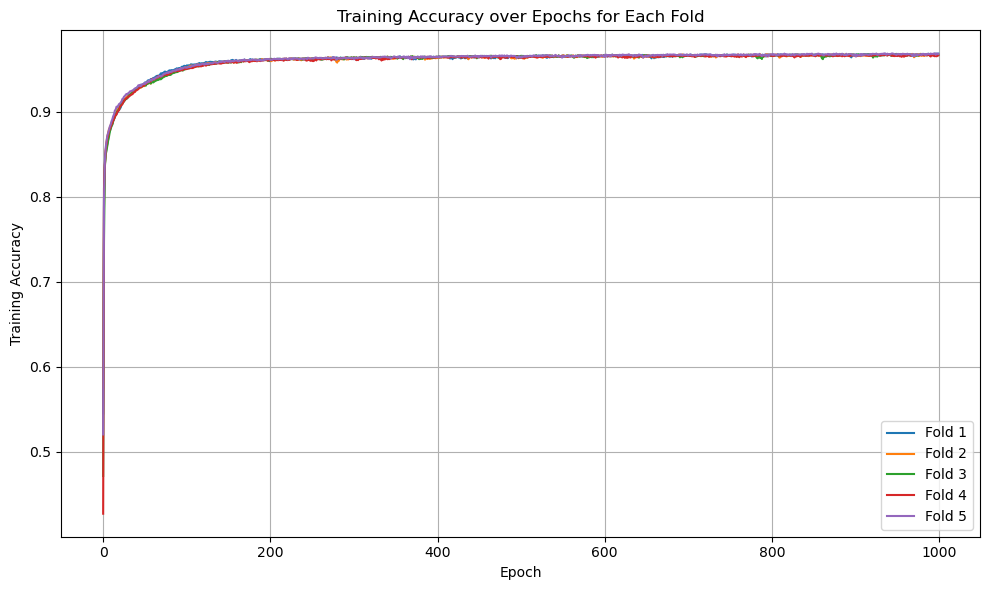

In [117]:


# Assuming X_train_scaled and y_train are already defined
X = X_train_scaled
y = y_train.values

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define the ANN model with Batch Normalization
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.PReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.PReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.PReLU(),
            nn.Dropout(0.3),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.PReLU(),

            nn.Linear(16, 2)
        )

    def forward(self, x):
        return self.model(x)

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=7)
fold = 1
accuracies = []
all_fold_accuracies = []

epochs = 1000

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    X_train_tensor = torch.tensor(X_train_fold, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train_fold, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val_fold, dtype=torch.long).to(device)

    input_size = X_train_tensor.shape[1]
    model = ANN(input_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    train_accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        preds = torch.argmax(outputs, dim=1)
        acc = (preds == y_train_tensor).float().mean().item()
        train_accuracies.append(acc)

    all_fold_accuracies.append(train_accuracies)

    model.eval()
    with torch.no_grad():
        outputs = model(X_val_tensor)
        val_preds = torch.argmax(outputs, dim=1)
        val_acc = (val_preds == y_val_tensor).float().mean().item()
        print(f"Fold {fold} Validation Accuracy: {val_acc:.4f}")
        accuracies.append(val_acc)
        fold += 1

# Final average validation accuracy
print(f"\nAverage Cross-Validation Accuracy: {np.mean(accuracies):.4f}")

# Plot training accuracy for each fold
plt.figure(figsize=(10, 6))
for i, acc in enumerate(all_fold_accuracies):
    plt.plot(acc, label=f'Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs for Each Fold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [118]:
# Define device and ensure model and tensors are on the same device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move model to the device
model = model.to(device)

# Move tensors to the same device
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
    test_acc = (test_preds == y_test_tensor).float().mean().item()
    print(f"\nTest Accuracy: {test_acc:.4f}")

Using device: cuda

Test Accuracy: 0.9634


# Model saving for the App

In [115]:
import joblib
import os
import torch

# Make sure the folder exists
os.makedirs('models', exist_ok=True)
print("[INFO] 'models' directory checked/created.")

try:
    print("[INFO] Saving Logistic Regression model...")
    joblib.dump(reg_model, 'models/logistic_regression.pkl')
    print("[SUCCESS] Logistic Regression model saved.")
except Exception as e:
    print(f"[ERROR] Failed to save Logistic Regression model: {e}")

try:
    print("[INFO] Saving Decision Tree model...")
    joblib.dump(tree_model, 'models/decision_tree.pkl')
    print("[SUCCESS] Decision Tree model saved.")
except Exception as e:
    print(f"[ERROR] Failed to save Decision Tree model: {e}")

try:
    print("[INFO] Saving Random Forest model...")
    joblib.dump(RF_model, 'models/random_forest.pkl')
    print("[SUCCESS] Random Forest model saved.")
except Exception as e:
    print(f"[ERROR] Failed to save Random Forest model: {e}")

try:
    print("[INFO] Saving KNN model...")
    joblib.dump(knn_model, 'models/knn.pkl')
    print("[SUCCESS] KNN model saved.")
except Exception as e:
    print(f"[ERROR] Failed to save KNN model: {e}")

try:
    print("[INFO] Saving XGBoost model...")
    joblib.dump(xgb_best, 'models/xgboost.pkl')
    print("[SUCCESS] XGBoost model saved.")
except Exception as e:
    print(f"[ERROR] Failed to save XGBoost model: {e}")

try:
    print("[INFO] Saving ANN model weights...")
    torch.save(model.state_dict(), 'models/ann_model.pth')
    print("[SUCCESS] ANN model weights saved.")
except Exception as e:
    print(f"[ERROR] Failed to save ANN model weights: {e}")

try:
    print("[INFO] Saving scaler object...")
    joblib.dump(scaler, 'models/scaler.pkl')
    print("[SUCCESS] Scaler saved.")
except Exception as e:
    print(f"[ERROR] Failed to save scaler: {e}")

print("[INFO] All save operations completed.")
# Example dictionary of your model accuracies
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, reg_model.predict(X_test_scaled)),
    "Decision Tree": accuracy_score(y_test, tree_model.predict(X_test_scaled)),
    "Random Forest": accuracy_score(y_test, RF_model.predict(X_test_scaled)),
    "KNN": accuracy_score(y_test, knn_model.predict(X_test_scaled)),
    "XGBoost": xgb_accuracy,  # From your previous code
    "ANN": np.mean(accuracies)  # Average CV accuracy from your ANN training
}

# Make sure the folder exists
os.makedirs('models', exist_ok=True)

# Save the accuracies dict to a pkl file
joblib.dump(model_accuracies, 'models/model_accuracies.pkl')
print("[INFO] Model accuracies saved successfully!")

[INFO] 'models' directory checked/created.
[INFO] Saving Logistic Regression model...
[SUCCESS] Logistic Regression model saved.
[INFO] Saving Decision Tree model...
[SUCCESS] Decision Tree model saved.
[INFO] Saving Random Forest model...
[SUCCESS] Random Forest model saved.
[INFO] Saving KNN model...
[SUCCESS] KNN model saved.
[INFO] Saving XGBoost model...
[SUCCESS] XGBoost model saved.
[INFO] Saving ANN model weights...
[SUCCESS] ANN model weights saved.
[INFO] Saving scaler object...
[SUCCESS] Scaler saved.
[INFO] All save operations completed.
[INFO] Model accuracies saved successfully!
